In [1]:
# Using make_classification library to create an classification dataset

from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=25)

In [2]:
import matplotlib.pyplot as plt

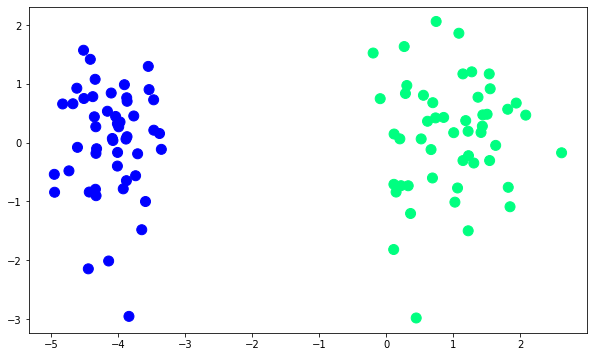

In [3]:
# Visualizing the data

plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [4]:
X

array([[ 0.66722345, -0.11697552],
       [ 0.21915571, -0.73115232],
       [ 0.11348561, -0.7081059 ],
       [-4.13830282, -2.01199214],
       [ 0.2671365 ,  1.63493163],
       [-3.37984898,  0.15599044],
       [-4.3395079 ,  1.07782053],
       [ 0.5536367 ,  0.80626713],
       [-0.09067699,  0.74859527],
       [-4.50718038,  0.75152794],
       [-4.32572723, -0.90114581],
       [-4.32729629, -0.1815243 ],
       [ 0.44603449, -2.98092432],
       [ 1.27361031,  1.20500136],
       [-4.3744499 ,  0.78302407],
       [ 0.85528328,  0.42968688],
       [ 0.32688933, -0.73229726],
       [-4.42699716, -0.83930476],
       [ 0.28564689,  0.83727062],
       [-4.31803309, -0.10255323],
       [-4.82401804,  0.65867001],
       [-4.61263278,  0.92649819],
       [-3.86434327,  0.10216193],
       [ 2.07840859,  0.46886454],
       [-3.7639417 ,  0.45432938],
       [ 1.0819483 ,  1.8613386 ],
       [-4.33504732, -0.79255991],
       [-3.58892937, -1.0004391 ],
       [-4.94811359,

In [5]:
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

In [6]:
# step fucntion will return 1 if value is greater than 1 else will return 0
def step(z):
    return 1 if z>0 else 0

In [7]:
# This function will return the updated weights

def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)      # Inserting 1 in front of X
    weights = np.ones(X.shape[1])    #weights have a shape equals to column of X
    lr = 0.1                        # learning rate
    
    for i in range(1000):           # epoch= 1000
        j = np.random.randint(0,100)   # Taking random values from the data 
        y_hat = step(np.dot(X[j],weights))  # step fucntion will return 1 if value is greater than 1 else will return 0
        weights = weights + lr*(y[j]-y_hat)*X[j] #Applying the formula
        
    return weights[0],weights[1:]
        

In [8]:
intercept_,coef_ = perceptron(X,y)

In [9]:
print(coef_)
print(intercept_)

[1.0666572  0.33857969]
1.3000000000000003


In [10]:
# Let say Ax+By+C=0, then to find m,c
# m(slope)=-A/B
#c(intersept)= -C/B


# here coef_[0]= A,coef_[1]=B,intercept=C

m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [11]:
x_input = np.linspace(-3,3,100)

y_input = m*x_input + b

(-3.0, 2.0)

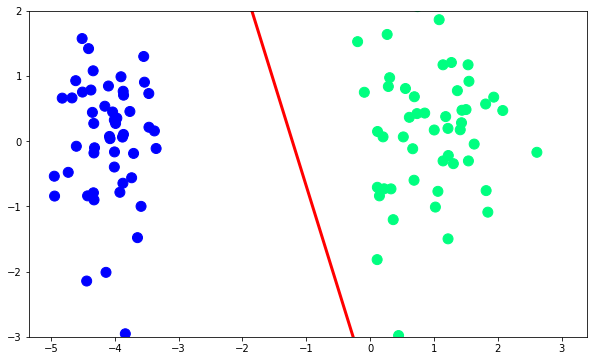

In [12]:
# Plotting the line 
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

### In the above line as we can see that, the line stops where all the points are correctly classified, it does not guarantee best line

# Lets see the line which is build by the sklearn library

In [13]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [14]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [15]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

(-3.0, 2.0)

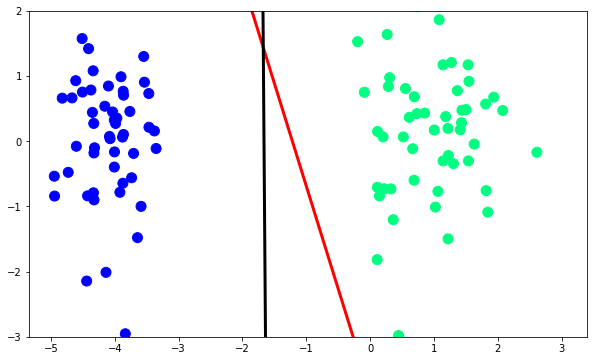

In [16]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

### The red line represent the line we made with the help of perceptron
### The black line is made from the sklearn model

# Lets make line with the help of sigmoid function

## Beacuse of Sigmoid funtion each and every point will be responsible to change the line 

In [18]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [19]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = sigmoid(np.dot(X[j],weights))     # using sigmoid function instead of the step function
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

In [20]:
intercept_,coef_ = perceptron(X,y)

In [21]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [22]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input + b

(-3.0, 2.0)

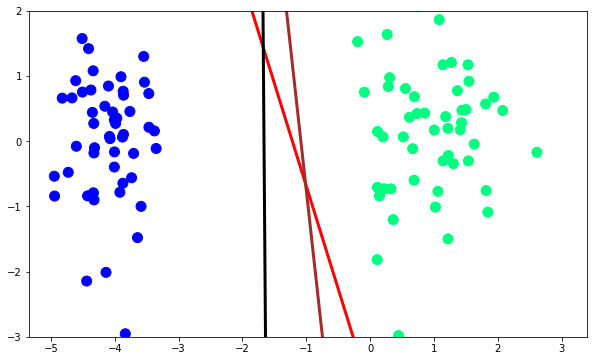

In [23]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.plot(x_input2,y_input2,color='brown',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

### As we can see that brown line works much better than the red line to classify the points.
